In [1]:
import tensorflow as tf
tf. __version__

'2.15.0'

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras
from keras.datasets import mnist

In [5]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
y_train[0]

5

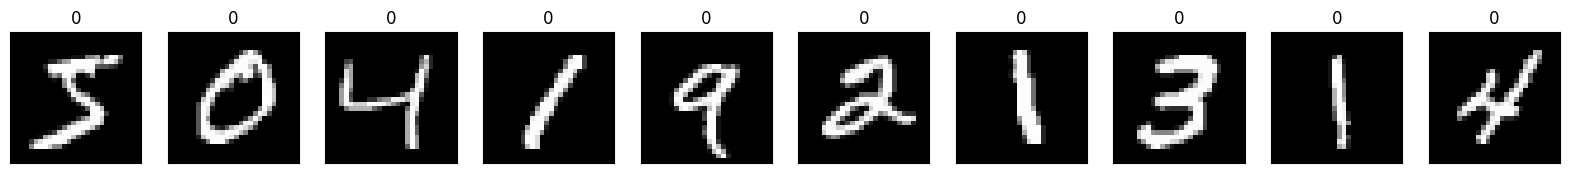

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(str(np.argmax(y_train[i])))  # Convert label to string
    axes[i].imshow(x_train[i].reshape(28, 28), cmap='gray')  # Reshape image for display
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

plt.show()




In [9]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=255
x_test /=255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
x_train[0]

In [15]:
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

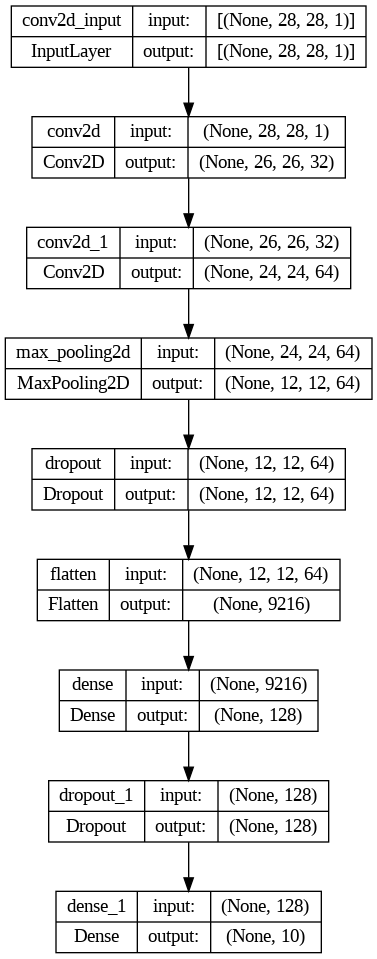

In [23]:
from tensorflow.keras.utils import plot_model

# Assuming 'model' is your Keras model
plot_model(model, show_shapes=True)


In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
# Train the model
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 149s 314ms/step - loss: 0.2532 - accuracy: 0.9217 - val_loss: 0.0605 - val_accuracy: 0.9805
Epoch 2/10
469/469 [==============================] - 138s 295ms/step - loss: 0.0881 - accuracy: 0.9737 - val_loss: 0.0399 - val_accuracy: 0.9870
Epoch 3/10
469/469 [==============================] - 137s 293ms/step - loss: 0.0668 - accuracy: 0.9801 - val_loss: 0.0341 - val_accuracy: 0.9886
Epoch 4/10
469/469 [==============================] - 137s 292ms/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0331 - val_accuracy: 0.9887
Epoch 5/10
469/469 [==============================] - 138s 294ms/step - loss: 0.0457 - accuracy: 0.9858 - val_loss: 0.0349 - val_accuracy: 0.9881
Epoch 6/10
469/469 [==============================] - 143s 306ms/step - loss: 0.0401 - accuracy: 0.9876 - val_loss: 0.0263 - val_accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 150s 320ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0279 -

In [25]:
model.save('mnist_cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


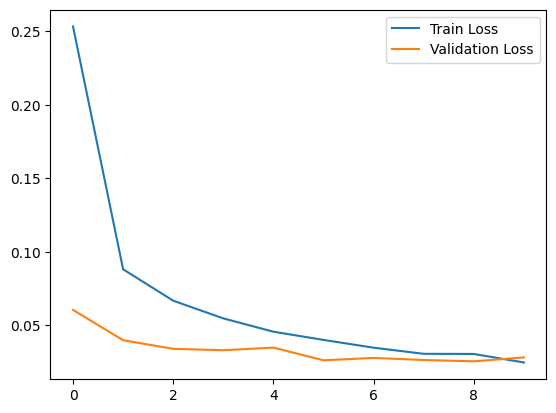

In [26]:
plt.plot(model.history.history['loss'],label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend()

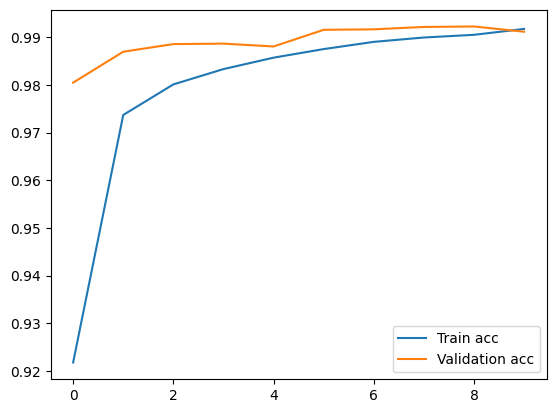

In [28]:
plt.plot(model.history.history['accuracy'], label='Train acc')
plt.plot(model.history.history['val_accuracy'],label='Validation acc')
plt.legend()

In [29]:
model = keras.models.load_model('mnist_cnn_model.h5')

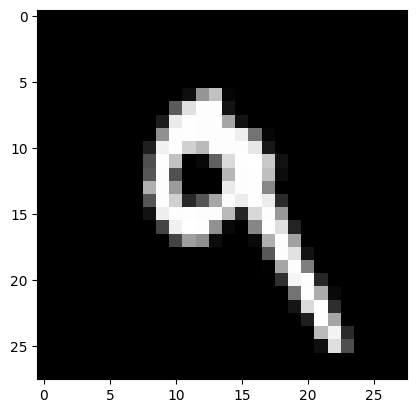

In [43]:
plt.imshow(x_test[7], cmap='gray')

In [44]:
z = np.reshape(x_test[7], (1, 28, 28, 1))
# Optionally, if you want to normalize the data
# z =x.astype('float32')
# z /= 255
np.argmax(model.predict(z))


1/1 [==============================] - 0s 28ms/step


9